# ***EDA on Airbnb Listing***

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Exploration

In [2]:
listing_data = pd.read_csv('/kaggle/input/seattle/listings.csv')

In [3]:
listing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [4]:
# Compute basic summary statistics (e.g., mean, median, standard deviation) for numeric variables.
(listing_data.select_dtypes(include=['int64', 'float64'])).describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [5]:
listing_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


# Cleaning Data

In [6]:
listings_df_miss = pd.DataFrame((listing_data.isnull().sum())*100/len(listing_data), columns=['Missing Values'])
listings_df_miss[listings_df_miss['Missing Values']>75]

,Missing Values
square_feet,97.459403
license,100.000000


In [7]:
#Removing columns which mostly with heighest count of nulls
missings = ['square_feet','license']
for i in missings:
    listing_data = listing_data.drop(columns=[i])

In [8]:
listings_df_miss[listings_df_miss['Missing Values']>20]

,Missing Values
neighborhood_overview,27.029859
notes,42.063908
transit,24.463070
host_about,22.498690
host_acceptance_rate,20.246202
square_feet,97.459403
weekly_price,47.380828
monthly_price,60.267156
security_deposit,51.126244
cleaning_fee,26.977475


In [9]:
# Fill nulls with zeros(correcting data inconsistencies)
missing_price = ['security_deposit','weekly_price','cleaning_fee','monthly_price','price']
for i in missing_price:
    listing_data[i].fillna('0',inplace=True)
    listing_data[i] = listing_data[i].str.replace('$','')
    listing_data[i] = listing_data[i].str.replace(',','')
    listing_data[i] = listing_data[i].astype('float')

In [10]:
listing_data[missing_price].head()

,security_deposit,weekly_price,cleaning_fee,monthly_price,price
0,0.0,0.0,0.0,0.0,85.0
1,100.0,1000.0,40.0,3000.0,150.0
2,1000.0,0.0,300.0,0.0,975.0
3,0.0,650.0,0.0,2300.0,100.0
4,700.0,0.0,125.0,0.0,450.0


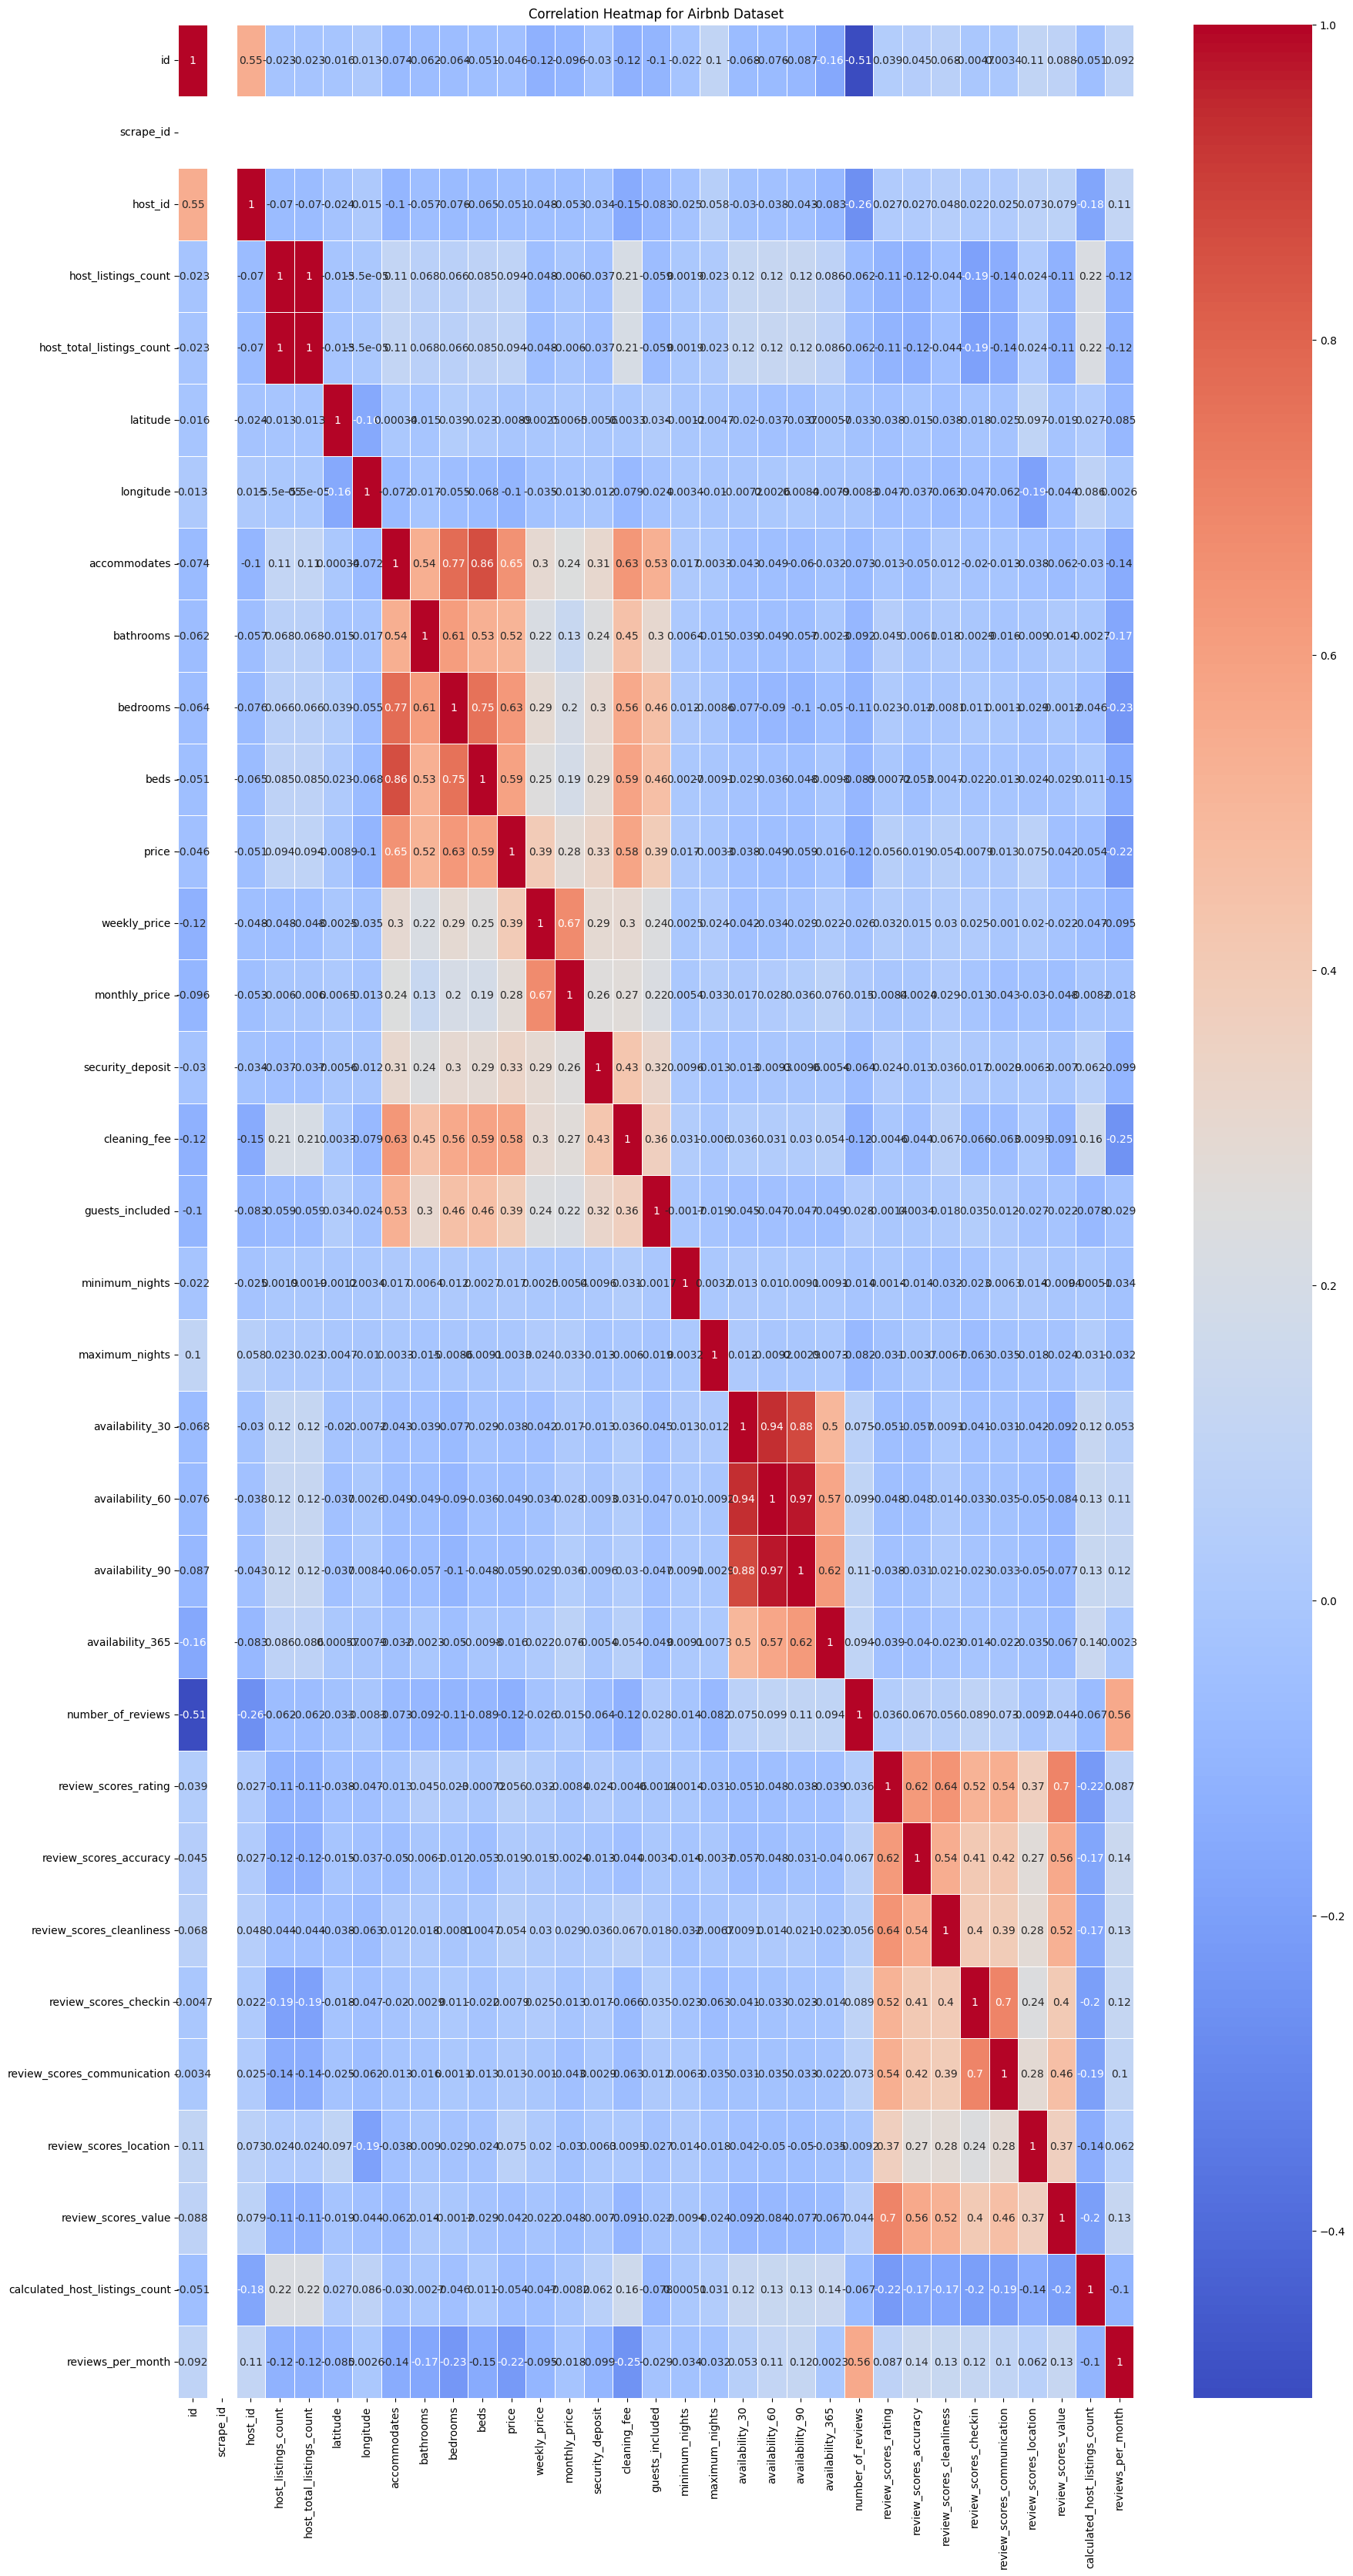

In [11]:
# Select numeric columns for correlation analysis
numeric_columns = listing_data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(20,40))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Airbnb Dataset')
plt.show()

In [12]:
#Remove redundent columns  
listing_data = listing_data.drop('scrape_id', axis=1)

# Visulizing and Statistics

In [13]:
# Group the data by neighborhood and calculate the average price
average_price_by_neighborhood = listing_data.groupby('neighbourhood')['price'].mean()

# Sort the results by average price (optional)
average_price_by_neighborhood.sort_values(ascending=False)

neighbourhood
Fairmount Park         370.000000
Industrial District    245.000000
Portage Bay            241.428571
Westlake               197.000000
Alki                   196.652174
                          ...    
Georgetown              77.000000
Rainier Beach           76.722222
Dunlap                  75.461538
Olympic Hills           63.666667
Roxhill                 60.000000
Name: price, Length: 81, dtype: float64

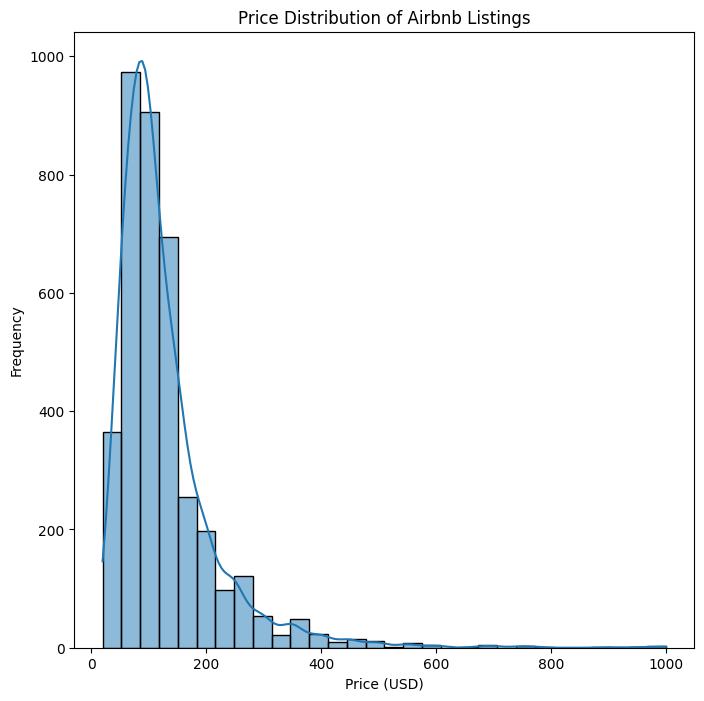

In [14]:
# Price Distribution
plt.figure(figsize=(8, 8))
sns.histplot(data=listing_data, x='price', bins=30, kde=True)
plt.title('Price Distribution of Airbnb Listings')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

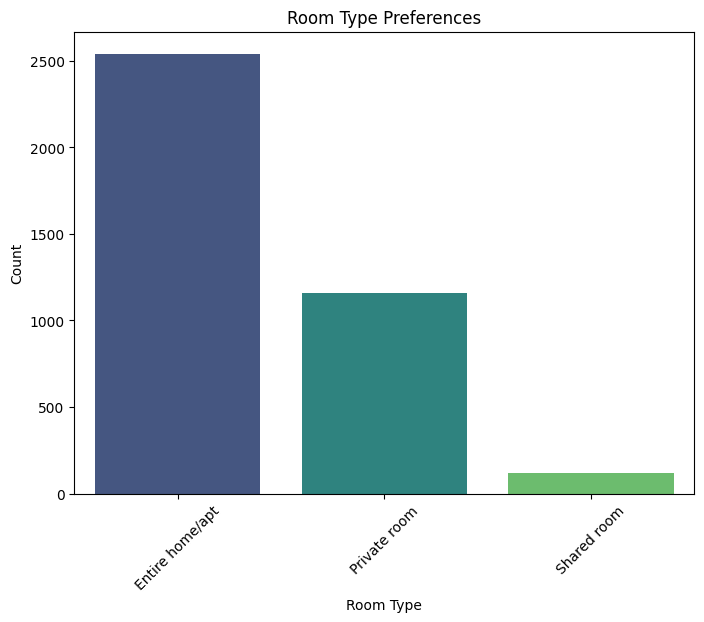

In [15]:
# Room Type Preferences
plt.figure(figsize=(8, 6))
sns.countplot(data=listing_data, x='room_type', palette='viridis')
plt.title('Room Type Preferences')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

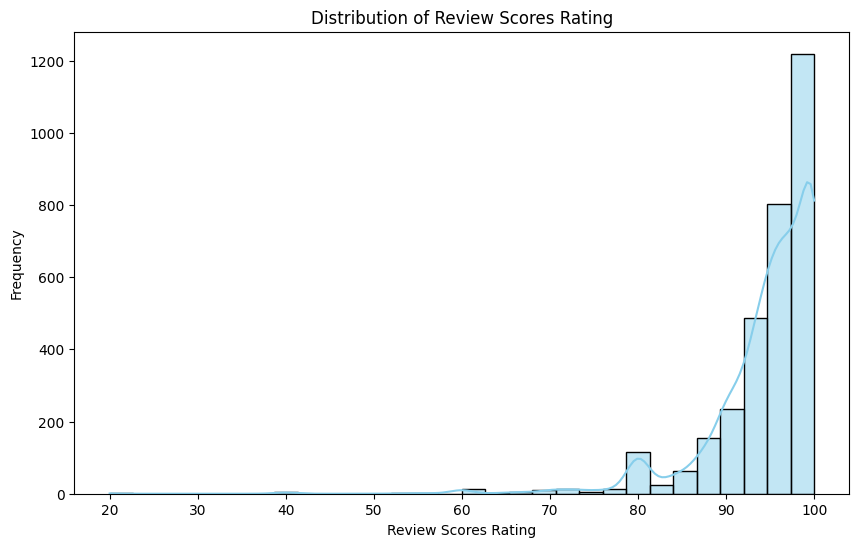

In [16]:
#Create a distribution plot (histogram) of review_scores_rating
plt.figure(figsize=(10, 6))
sns.histplot(data=listing_data, x='review_scores_rating', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Frequency')
plt.show()

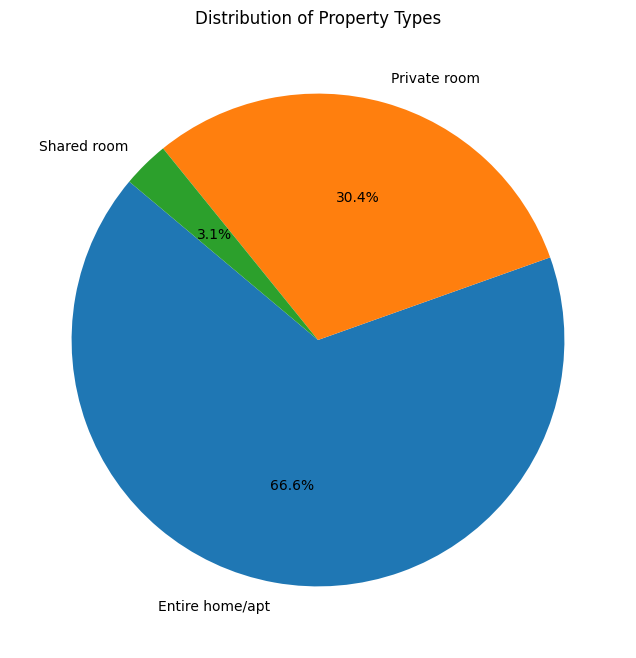

In [17]:
# Calculate the distribution of property types
property_type_counts = listing_data['room_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(property_type_counts, labels=property_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Property Types')
plt.show()

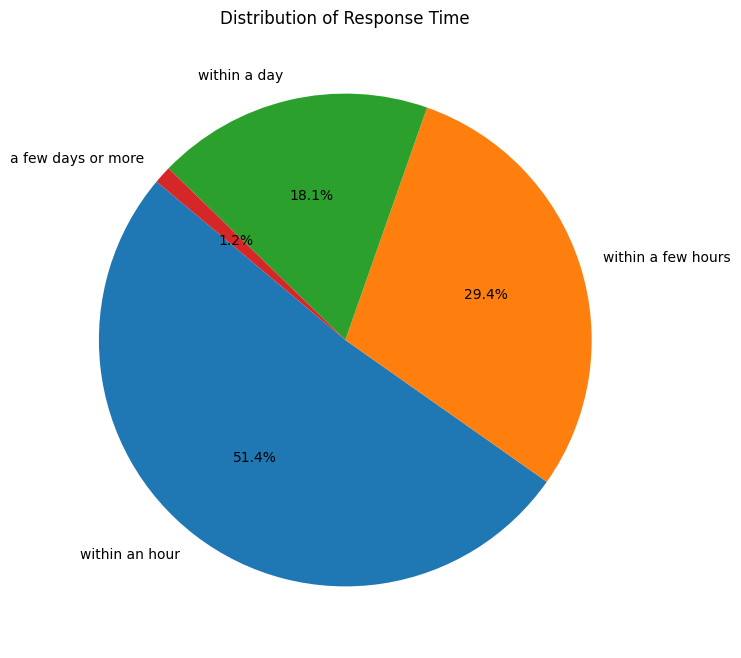

In [18]:
# Calculate the distribution of response time
property_type_counts = listing_data['host_response_time'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(property_type_counts, labels=property_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Response Time')
plt.show()

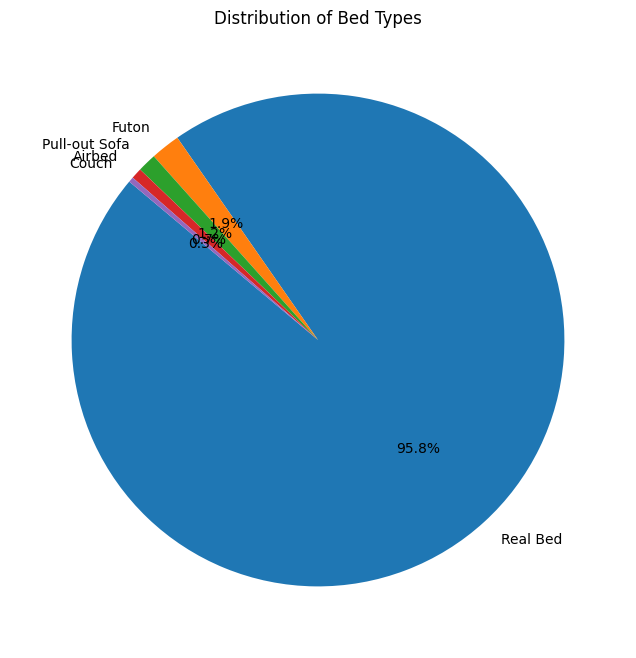

In [19]:
# Calculate the distribution of bed types
property_type_counts = listing_data['bed_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(property_type_counts, labels=property_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Bed Types')
plt.show()

# ***EDA on Airbnb Calender***

# Data Exploration

In [20]:
calender_data = pd.read_csv('/kaggle/input/seattle/calendar.csv', parse_dates = ['date'])

In [21]:
calender_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       934542 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 42.5+ MB


In [22]:
calender_data.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


# Data Cleaning

In [23]:
calender_data['price'].fillna('0',inplace=True)
calender_data['price'] = calender_data['price'].str.replace('$','')
calender_data['price'] = calender_data['price'].str.replace(',','')
calender_data['price'] = calender_data['price'].astype('float')

In [24]:
calender_data['available'] = calender_data['available'].replace({'t':1,'f':0})

In [25]:
calender_data['month'] = calender_data['date'].dt.month

# Visulizing and Statistics

(0.0, 350.0)

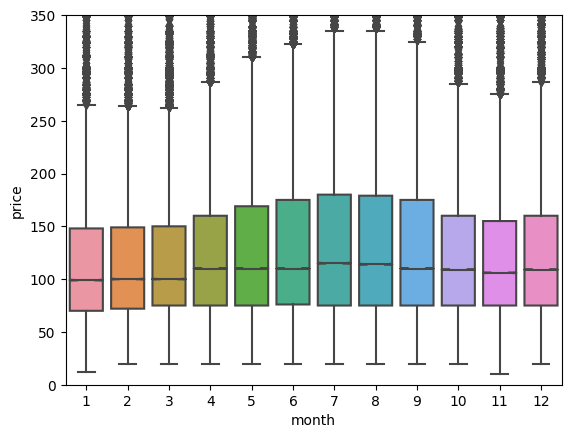

In [26]:
av = calender_data['available'] == 1
ax_1 = sns.boxplot(data = calender_data.loc[av,:], x = 'month', y ='price', notch = True)
ax_1.set_xticklabels(ax_1.get_xticklabels())
ax_1.set_ylim(0,350)

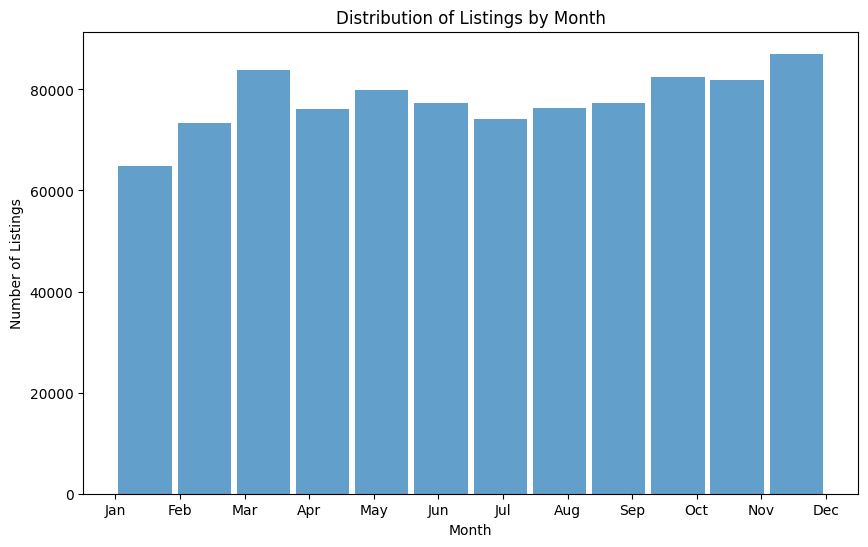

In [27]:
# Create a histogram to show the distribution of listings by months
plt.figure(figsize=(10, 6))
month = (calender_data.loc[av,:])['month']
plt.hist( x= month, bins=12, rwidth=0.9, alpha=0.7)
plt.title('Distribution of Listings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Listings')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# ***EDA on Airbnb Reviews***

# Data Exploration

In [28]:
reviews_data = pd.read_csv('/kaggle/input/seattle/reviews.csv')

In [29]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [30]:
reviews_data.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


In [31]:
reviews_data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


# Data Cleaning

In [32]:
# Removing rows which contain nulls
reviews_data = reviews_data.dropna()

# Statistics 

In [33]:
# Number of unique listings and unique reviewers
print(f"Number of unique listings: {reviews_data['listing_id'].nunique()}")
print(f"Number of unique reviewers: {reviews_data['reviewer_id'].nunique()}")

Number of unique listings: 3191
Number of unique reviewers: 75717


In [34]:
# Convert 'date' column to datetime
reviews_data['date'] = pd.to_datetime(reviews_data['date'])
# Find the earliest and latest review dates
print(f"Earliest review date: {reviews_data['date'].min()}")
print(f"Latest review date: {reviews_data['date'].max()}")

Earliest review date: 2009-06-07 00:00:00
Latest review date: 2016-01-03 00:00:00


In [35]:
# Top 10 reviewers by the number of reviews
print(f"\nTop 10 Reviewers: {reviews_data['reviewer_name'].value_counts().head(10)}")


Top 10 Reviewers: reviewer_name
David       870
Michael     820
Sarah       681
John        608
Chris       570
Jennifer    526
Jessica     492
Andrew      437
Laura       436
Daniel      424
Name: count, dtype: int64


In [36]:
# Function to tokenize and count positive unique words within a comment
def count_unique_words(comment):
    words = comment.split()
    unique_words = list(set(words))
    total = 0
    for i in range(len(unique_words)):
        if unique_words[i] in Positive_reviwes:
            total+=1
    return total

Positive_reviwes = ['great','nice','Great','beautiful','perfect','comfortable','Thank','Thanks']

reviews_data['unique_word_count'] = reviews_data['comments'].apply(count_unique_words)

print(reviews_data['unique_word_count'].sum())

94060
